In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import plotly.express as px
import plotly.graph_objects as go

In [58]:
nyc_df = pd.read_csv('../dataframes/nycsquirrels_raw.csv')

##### Don't run the cell below multiple times because of the implementation of date_only

<AxesSubplot:>

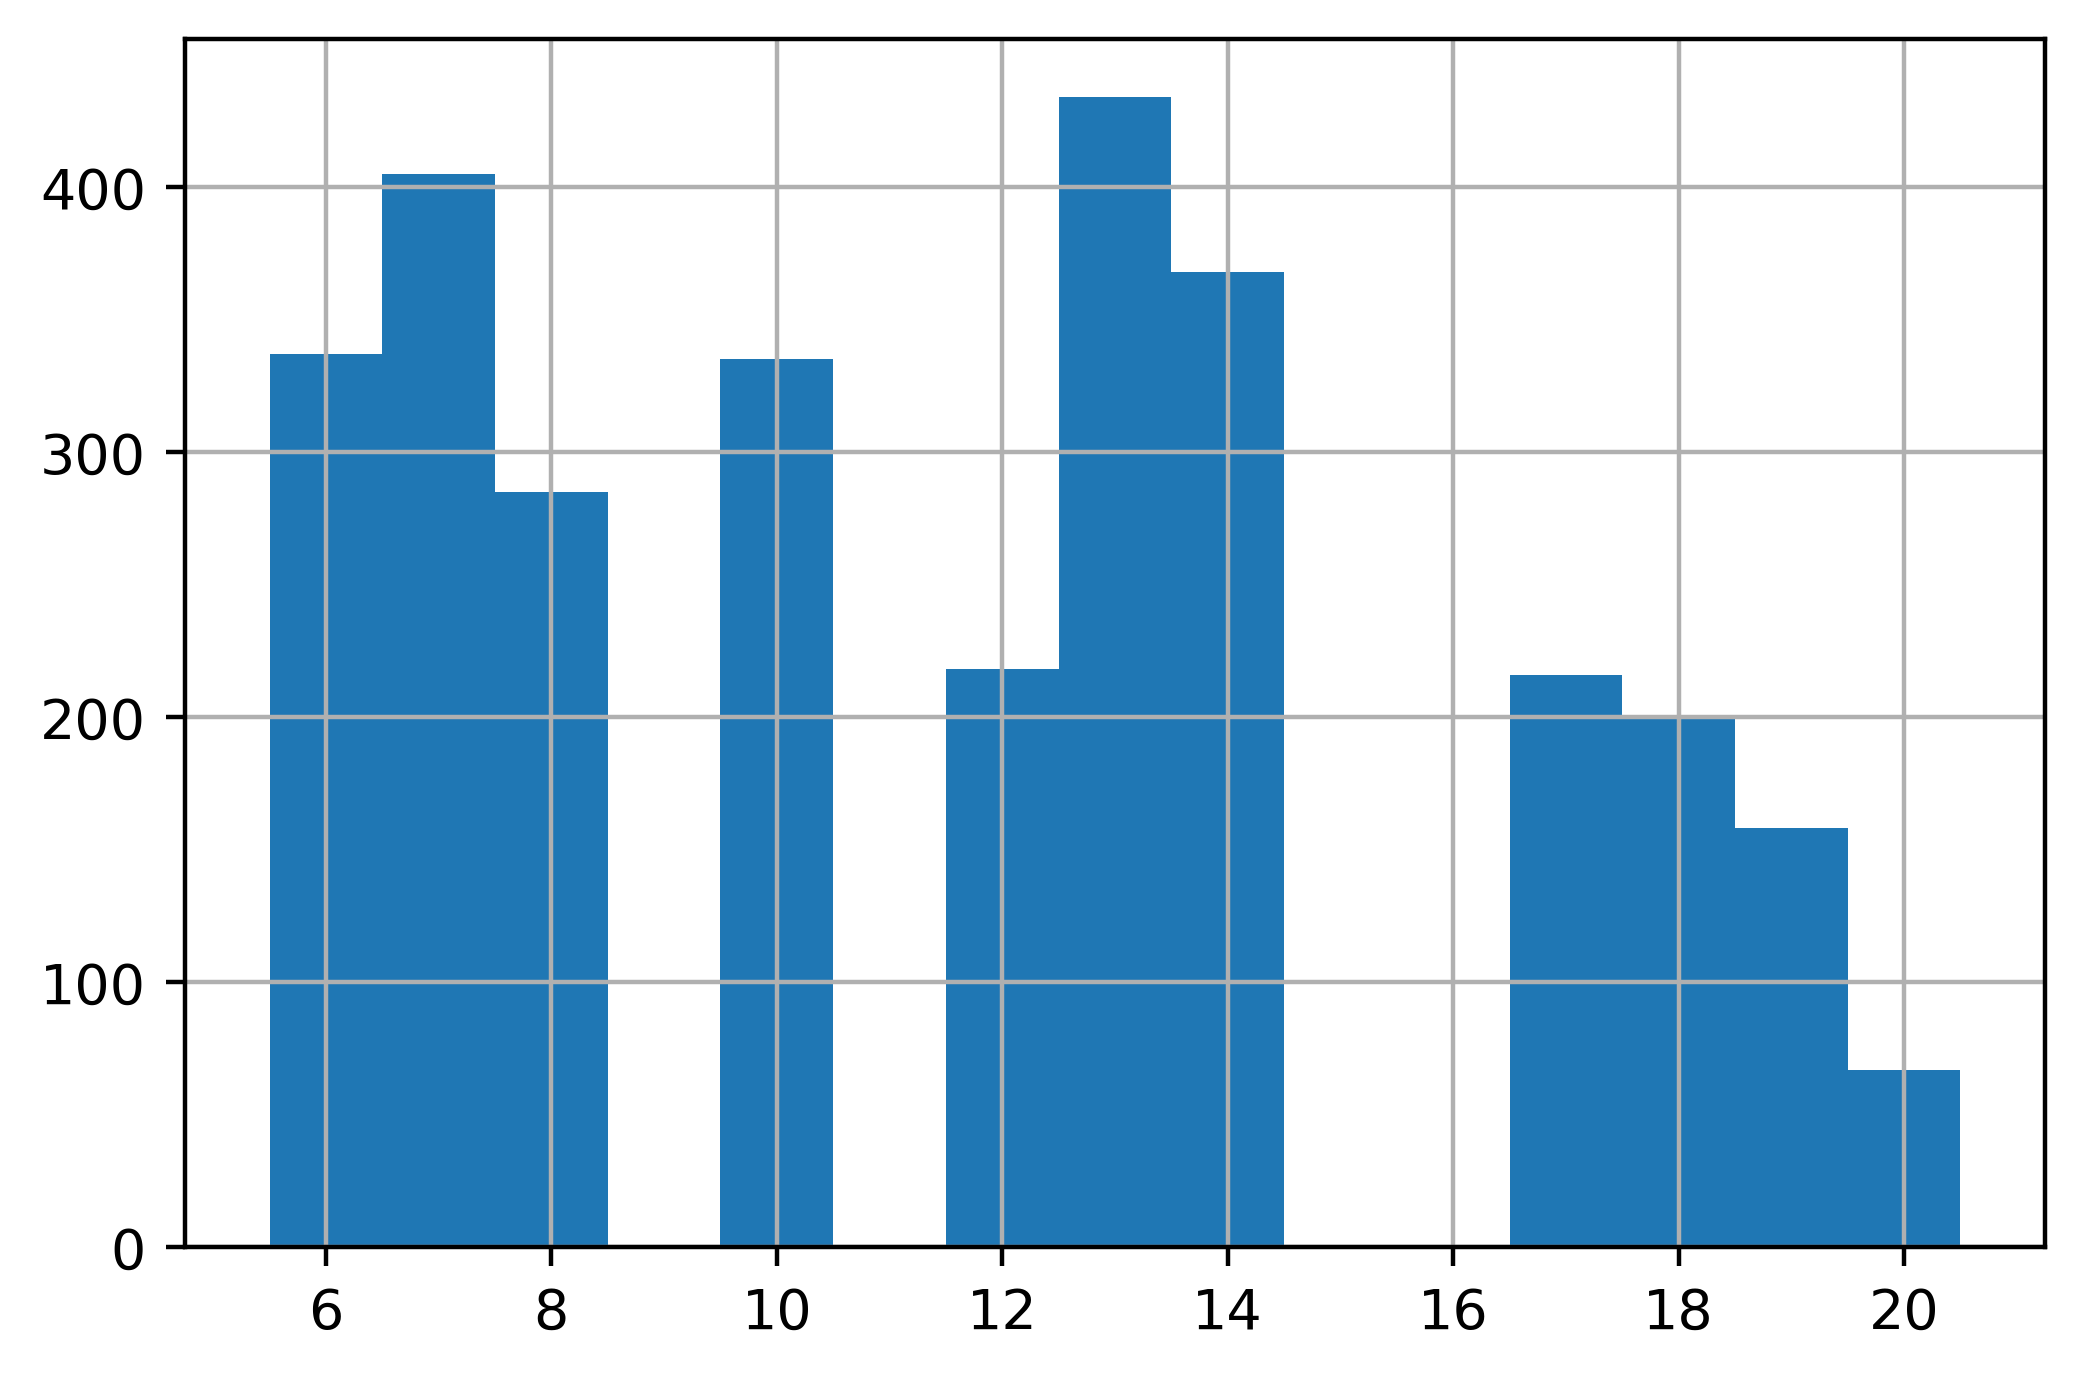

In [59]:
def date_only(date):
    return int(str(date)[2:4])

nyc_df['date'] = nyc_df['date'].apply(date_only)
date_bins = np.array(range(6,22)) - 0.5
nyc_df['date'].hist(bins=date_bins)

In [13]:
nyc_df.groupby('date').count()

,long,lat,unique_squirrel_id,hectare,shift,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,combination_of_primary_and_highlight_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
date,,,,,,,,,,,,,,,,,,,,,
6,337,337,337,337,337,337,323,333,211,337,...,337,337,337,43,337,0,337,337,337,337
7,405,405,405,405,405,405,386,390,249,405,...,405,405,405,29,405,1,405,405,405,405
8,285,285,285,285,285,285,280,281,143,285,...,285,285,285,18,285,0,285,285,285,285
10,335,335,335,335,335,335,326,328,203,335,...,335,335,335,25,335,2,335,335,335,335
12,218,218,218,218,218,218,212,217,175,218,...,218,218,218,12,218,1,218,218,218,218
13,434,434,434,434,434,434,403,425,306,434,...,434,434,434,34,434,0,434,434,434,434
14,368,368,368,368,368,368,347,363,258,368,...,368,368,368,35,368,5,368,368,368,368
17,216,216,216,216,216,216,211,215,134,216,...,216,216,216,15,216,0,216,216,216,216
18,200,200,200,200,200,200,195,199,115,200,...,200,200,200,11,200,0,200,200,200,200


In [15]:
date_count = nyc_df.groupby('date').count().get('lat')
date_distr = px.bar(date_count)
date_distr.show()

In [18]:
nyc_df['combo_gen'] = nyc_df['combination_of_primary_and_highlight_color'].apply(lambda x: x.split(', ')[0])
color_count = nyc_df['combo_gen'].value_counts().sort_index()

<AxesSubplot:>

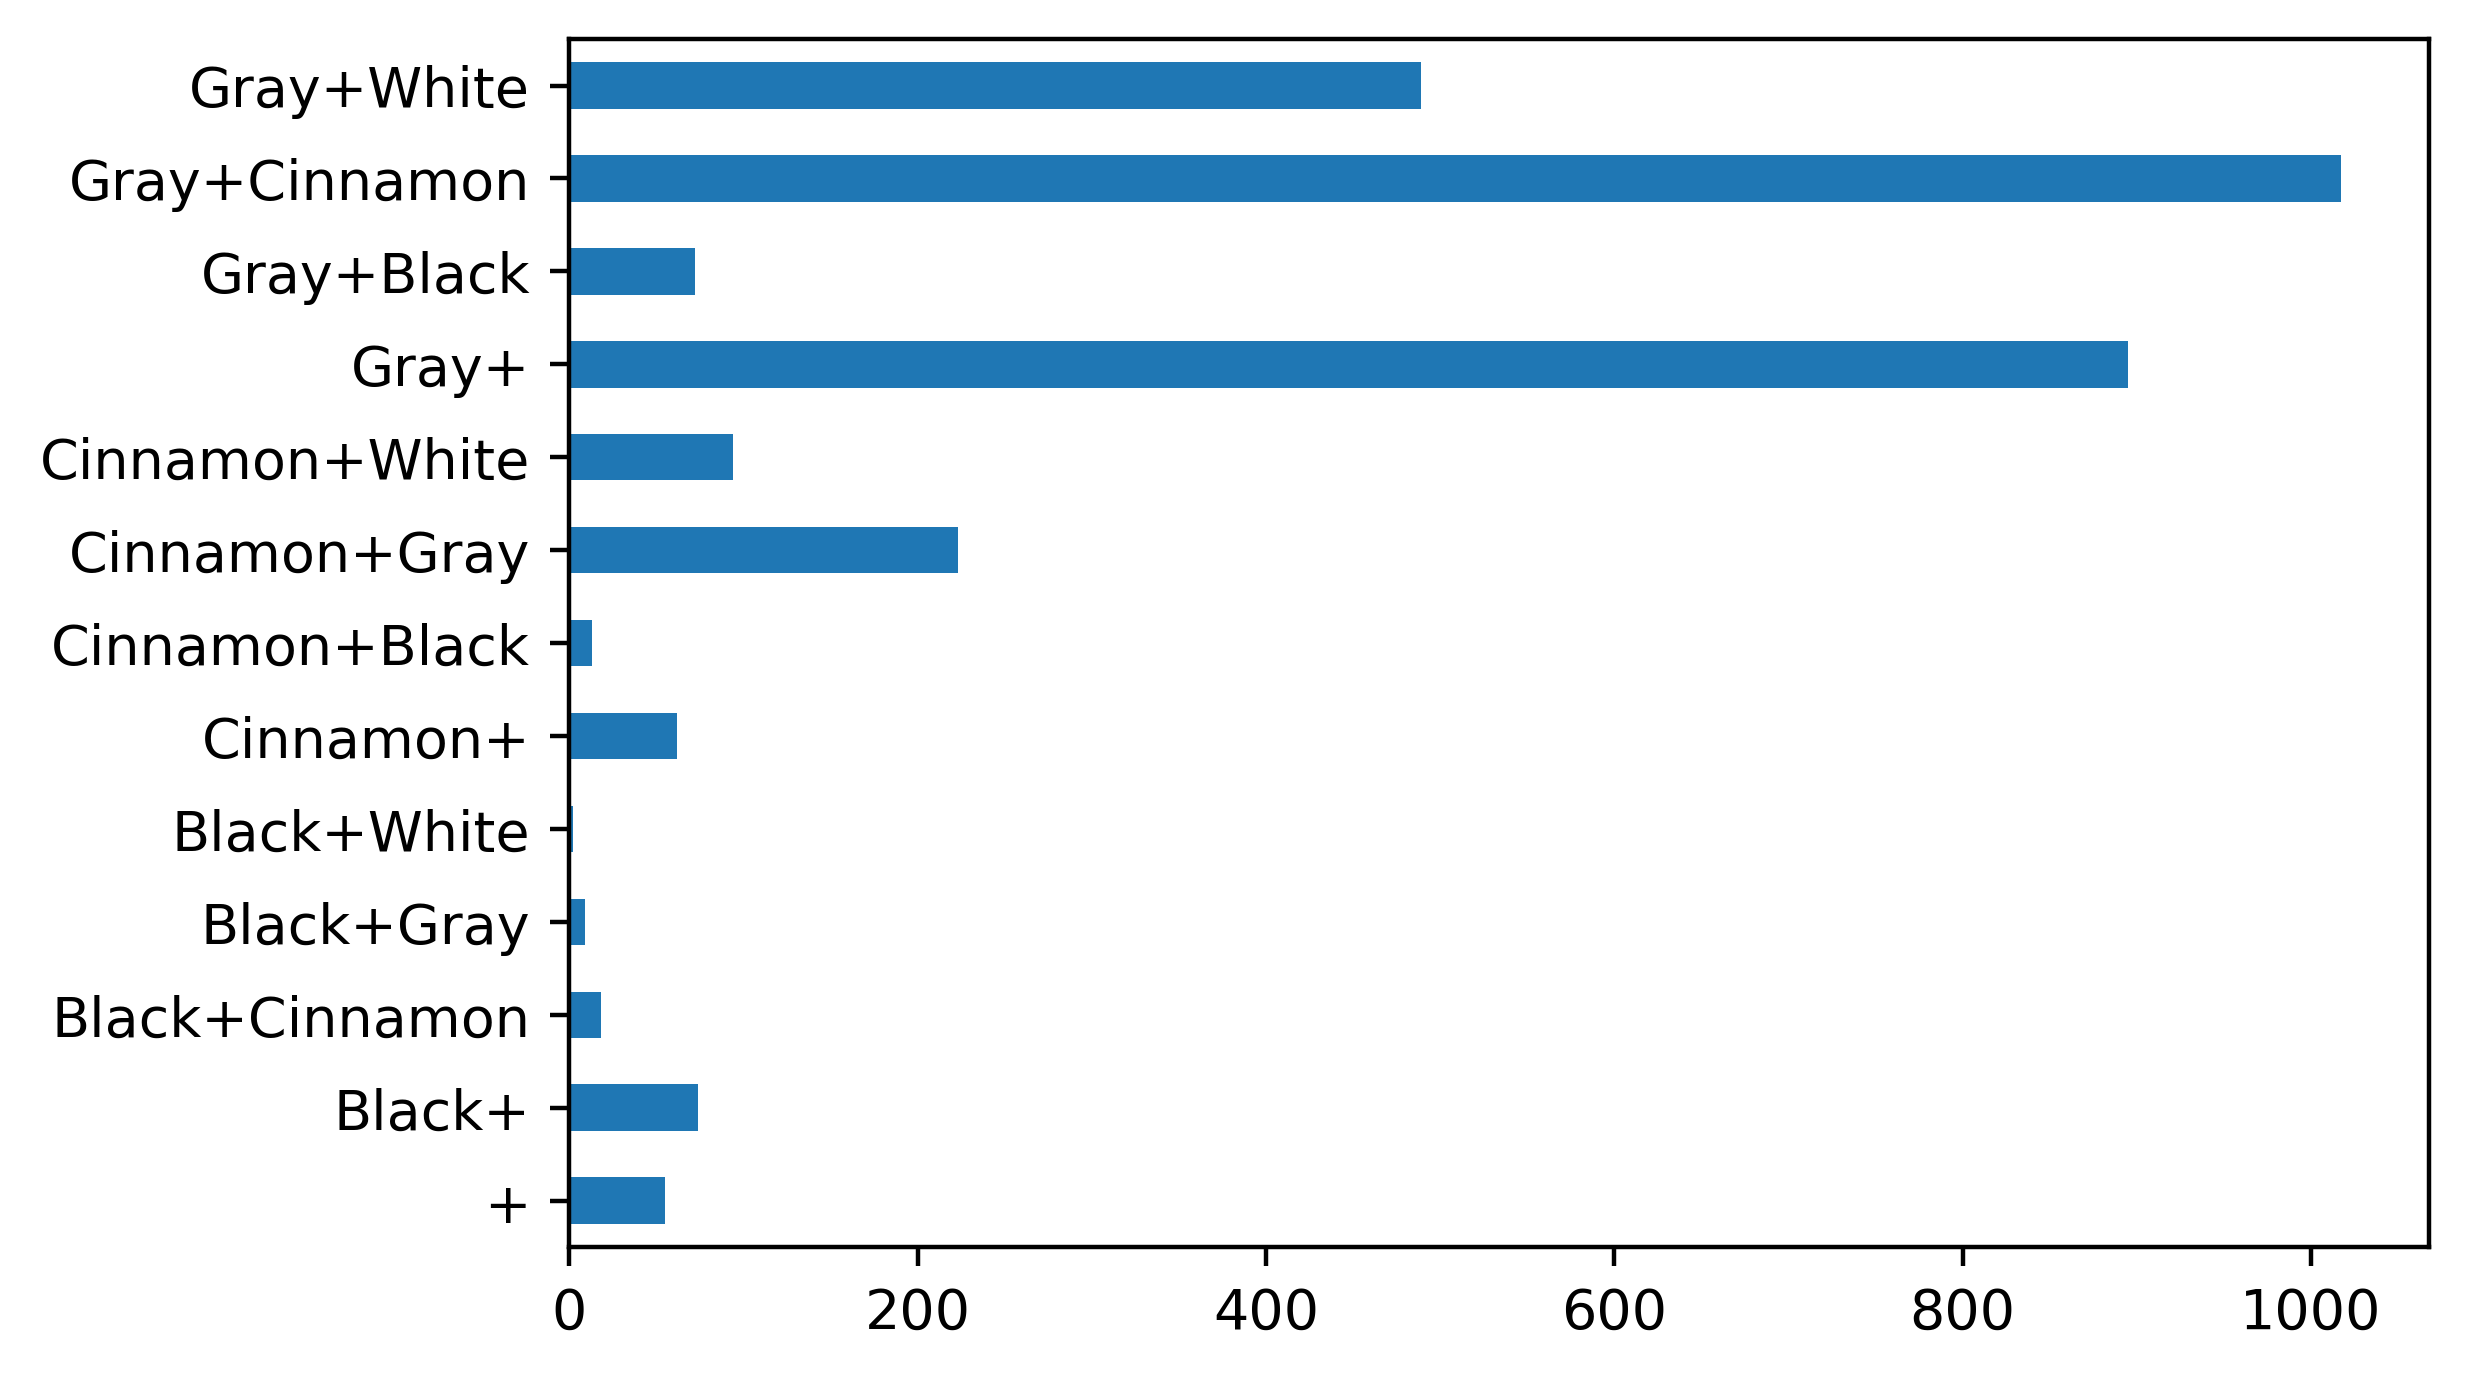

In [19]:
nyc_df['combo_gen'].value_counts().sort_index().plot(kind = 'barh')

In [133]:
len([])

0

In [136]:
color_count = nyc_df.groupby('combination_of_primary_and_highlight_color', dropna=False, as_index=False).count()
highlight = color_count['combination_of_primary_and_highlight_color'].apply(lambda x: (x.split('+')[1]).split(', '))
primary = color_count['combination_of_primary_and_highlight_color'].apply(lambda x: x.split('+')[0])
color_count['primary'] = primary
color_count['highlight'] = highlight
color_count['count'] = color_count['lat']
color_count = color_count[['primary', 'highlight', 'count']]
color_count

,primary,highlight,count
0,,[],55
1,Black,[],74
2,Black,[Cinnamon],15
3,Black,"[Cinnamon, White]",3
4,Black,[Gray],8
5,Black,"[Gray, White]",1
6,Black,[White],2
7,Cinnamon,[],62
8,Cinnamon,[Black],10
9,Cinnamon,"[Black, White]",3


In [109]:
individual_combo = nyc_df.groupby('combination_of_primary_and_highlight_color', dropna=False, as_index=False).count()
individual_combo['count'] = primary_colors
individual_combo = individual_combo[['combination_of_primary_and_highlight_color', 'count']]
individual_combo

,combination_of_primary_and_highlight_color,count
0,+,NaN
1,Black+,NaN
2,Black+Cinnamon,NaN
3,"Black+Cinnamon, White",NaN
4,Black+Gray,NaN
5,"Black+Gray, White",NaN
6,Black+White,NaN
7,Cinnamon+,NaN
8,Cinnamon+Black,NaN
9,"Cinnamon+Black, White",NaN


In [192]:
nyc_df['primary_fur_color'] = nyc_df['primary_fur_color'].fillna('null')
primary_colors = nyc_df['combination_of_primary_and_highlight_color'].value_counts(dropna=False, normalize=True)
grays = list(filter(lambda x: x[:4] == 'Gray', primary_colors.index))
primary_colors.filter('index in @grays')
individual_combo = pd.DataFrame(primary_colors).reset_index()
individual_combo['color'] = individual_combo['index']
individual_combo['proportion'] = individual_combo['combination_of_primary_and_highlight_color']
individual_combo = individual_combo[['color', 'proportion']]
individual_combo.query('color in @grays')
individual_combo
highlight_count = individual_combo['color'].apply(lambda x: str((x.split('+')[1]).count(',')) + ' highlight colors')
individual_combo['highlight_count'] = highlight_count
individual_combo['primary color'] = individual_combo['color'].apply(lambda x: x.split('+')[0])

individual_combo['primary color'] = individual_combo['primary color'].replace('', 'null')
aggregate = individual_combo.groupby(['primary color', 'highlight_count'], as_index=False).sum()

aggregate['new'] = range(1,len(aggregate)+1)
aggregate.loc[aggregate.index==7, 'new'] = 0
aggregate = aggregate.sort_values('new').reset_index(drop='True').drop('new', axis=1)
totals = aggregate.groupby('primary color').sum()
totals['proportion']

primary color
Black       0.034072
Cinnamon    0.129673
Gray        0.818062
null        0.018194
Name: proportion, dtype: float64

In [202]:
color_distr = px.bar(aggregate, 
                     x = 'primary color',
                     y = 'proportion',
                    color='highlight_count',
                    color_discrete_map={
                        '0 highlight colors': '#787878',
                        '1 highlight colors': '#262626',
                        '2 highlight colors': '#000000'
                    },
                     width=800,
                     height=600,
                     title='Primary and Highlight Colors of Squirrels'
                    )
color_distr.show()

In [197]:
primary=totals['proportion'].index


fig = go.Figure(data=[
    go.Bar(name='Primary Color', x=primary, y=totals['proportion'], textauto=True)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'textauto'

Did you mean "text"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "text"?

Bad property path:
textauto
^^^^^^^^

In [90]:
color_distr = px.bar(color_count, 
                     x = 'primary',
                     y = 'count',
                    hover_data = ['highlight'])
color_distr.show()

In [207]:
nyc_df

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,14,3,NaN,null,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,6,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,18,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,18,1,NaN,null,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,7,4,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,13,5,Adult,Gray,White,...,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,12,7,Adult,Gray,"Black, Cinnamon, White",...,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10,2,NaN,Gray,"Cinnamon, White",...,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [263]:
behaviors = [
    'approaches', 
    'indifferent', 
    'runs_from',
    'running',
    'chasing',
    'eating', 
    'climbing',
    'foraging',
    'kuks',
    'quaas',
    'moans',
    'tail_flags',
    'tail_twitches'
]
bcd = nyc_df.groupby('primary_fur_color').sum()[behaviors]
list(bcd.sum())

[178, 1454, 678, 730, 279, 760, 658, 1435, 102, 50, 3, 155, 434]

In [252]:
behaviors = list(bcd.columns)
behaviors
behaviors

['approaches',
 'indifferent',
 'runs_from',
 'running',
 'chasing',
 'eating',
 'climbing',
 'foraging',
 'kuks',
 'quaas',
 'moans',
 'tail_flags',
 'tail_twitches']

In [257]:
bcd_fig = go.Figure(
    data=[
        go.Bar(name='null', 
               y=bcd.columns, 
               x=bcd.iloc[3],
               marker=dict(color='blue'),
               orientation='h'),
        go.Bar(name='Black', 
               y=bcd.columns, 
               x=bcd.iloc[0],
               marker=dict(color='#000000'),
               orientation='h'),
        go.Bar(name='Cinnamon', 
               y=bcd.columns,
               x=bcd.iloc[1],
               marker=dict(color='#713517'),
               orientation='h'),
        go.Bar(name='Gray', 
               y=bcd.columns, 
               x=bcd.iloc[2],
               marker=dict(color='#575757'),
               orientation='h')
    ]
)

# Change the bar mode
bcd_fig.update_layout(barmode='stack', width=800, yaxis={
    'categoryarray': behaviors,
    'categoryorder':'array'},
                     title='Primary Colors and Behaviors of Squirrels')
bcd_fig.show()

In [293]:
round((bcd.sum()/3023) * 100, 4)

approaches        5.8882
indifferent      48.0979
runs_from        22.4281
running          24.1482
chasing           9.2292
eating           25.1406
climbing         21.7665
foraging         47.4694
kuks              3.3741
quaas             1.6540
moans             0.0992
tail_flags        5.1274
tail_twitches    14.3566
dtype: float64

In [299]:
bcd_fig = go.Figure(
    data=[
        go.Bar(name='Black', 
               y=bcd.columns, 
               x=bcd.iloc[0],
               marker=dict(color='#000000'),
               orientation='h'),
        go.Bar(name='Cinnamon', 
               y=bcd.columns,
               x=bcd.iloc[1],
               marker=dict(color='#713517'),
               orientation='h'),
        go.Bar(name='Gray', 
               y=bcd.columns, 
               x=bcd.iloc[2],
               marker=dict(color='#575757'),
               orientation='h')
    ]
)

totals = list(round((bcd.sum()/3023) * 100, 2))
total_labels = [{"y": y, "x": (total*30) + 100, "text": str(total) + ' %', "showarrow": False} for y, total in zip(bcd.columns, totals)]


# Change the bar mode
bcd_fig.update_layout(
    barmode='stack', 
    width=800, 
    yaxis={
        'categoryarray': behaviors,
        'categoryorder':'array',
        'title': 'behaviors'},
    xaxis={
        'title': 'number of squirrels'
    },
    title='Primary Colors and Behaviors of Squirrels',
    annotations=total_labels
)


bcd_fig.show()

In [6]:
movements = nyc_df.groupby('combo_gen').mean().get(['running', 'chasing', 'climbing', 'eating', 'foraging'])
movements

,running,chasing,climbing,eating,foraging
combo_gen,,,,,
Black+,0.243243,0.081081,0.216216,0.189189,0.486486
Black+Cinnamon,0.277778,0.055556,0.388889,0.333333,0.111111
Black+Gray,0.222222,0.000000,0.222222,0.444444,0.444444
Black+White,0.500000,0.000000,0.000000,0.000000,0.500000
Cinnamon+,0.354839,0.096774,0.193548,0.241935,0.516129
Cinnamon+Black,0.076923,0.000000,0.076923,0.230769,0.692308
Cinnamon+Gray,0.251121,0.062780,0.224215,0.309417,0.533632
Cinnamon+White,0.255319,0.106383,0.202128,0.255319,0.457447
Gray+,0.254749,0.108380,0.245810,0.191061,0.403352


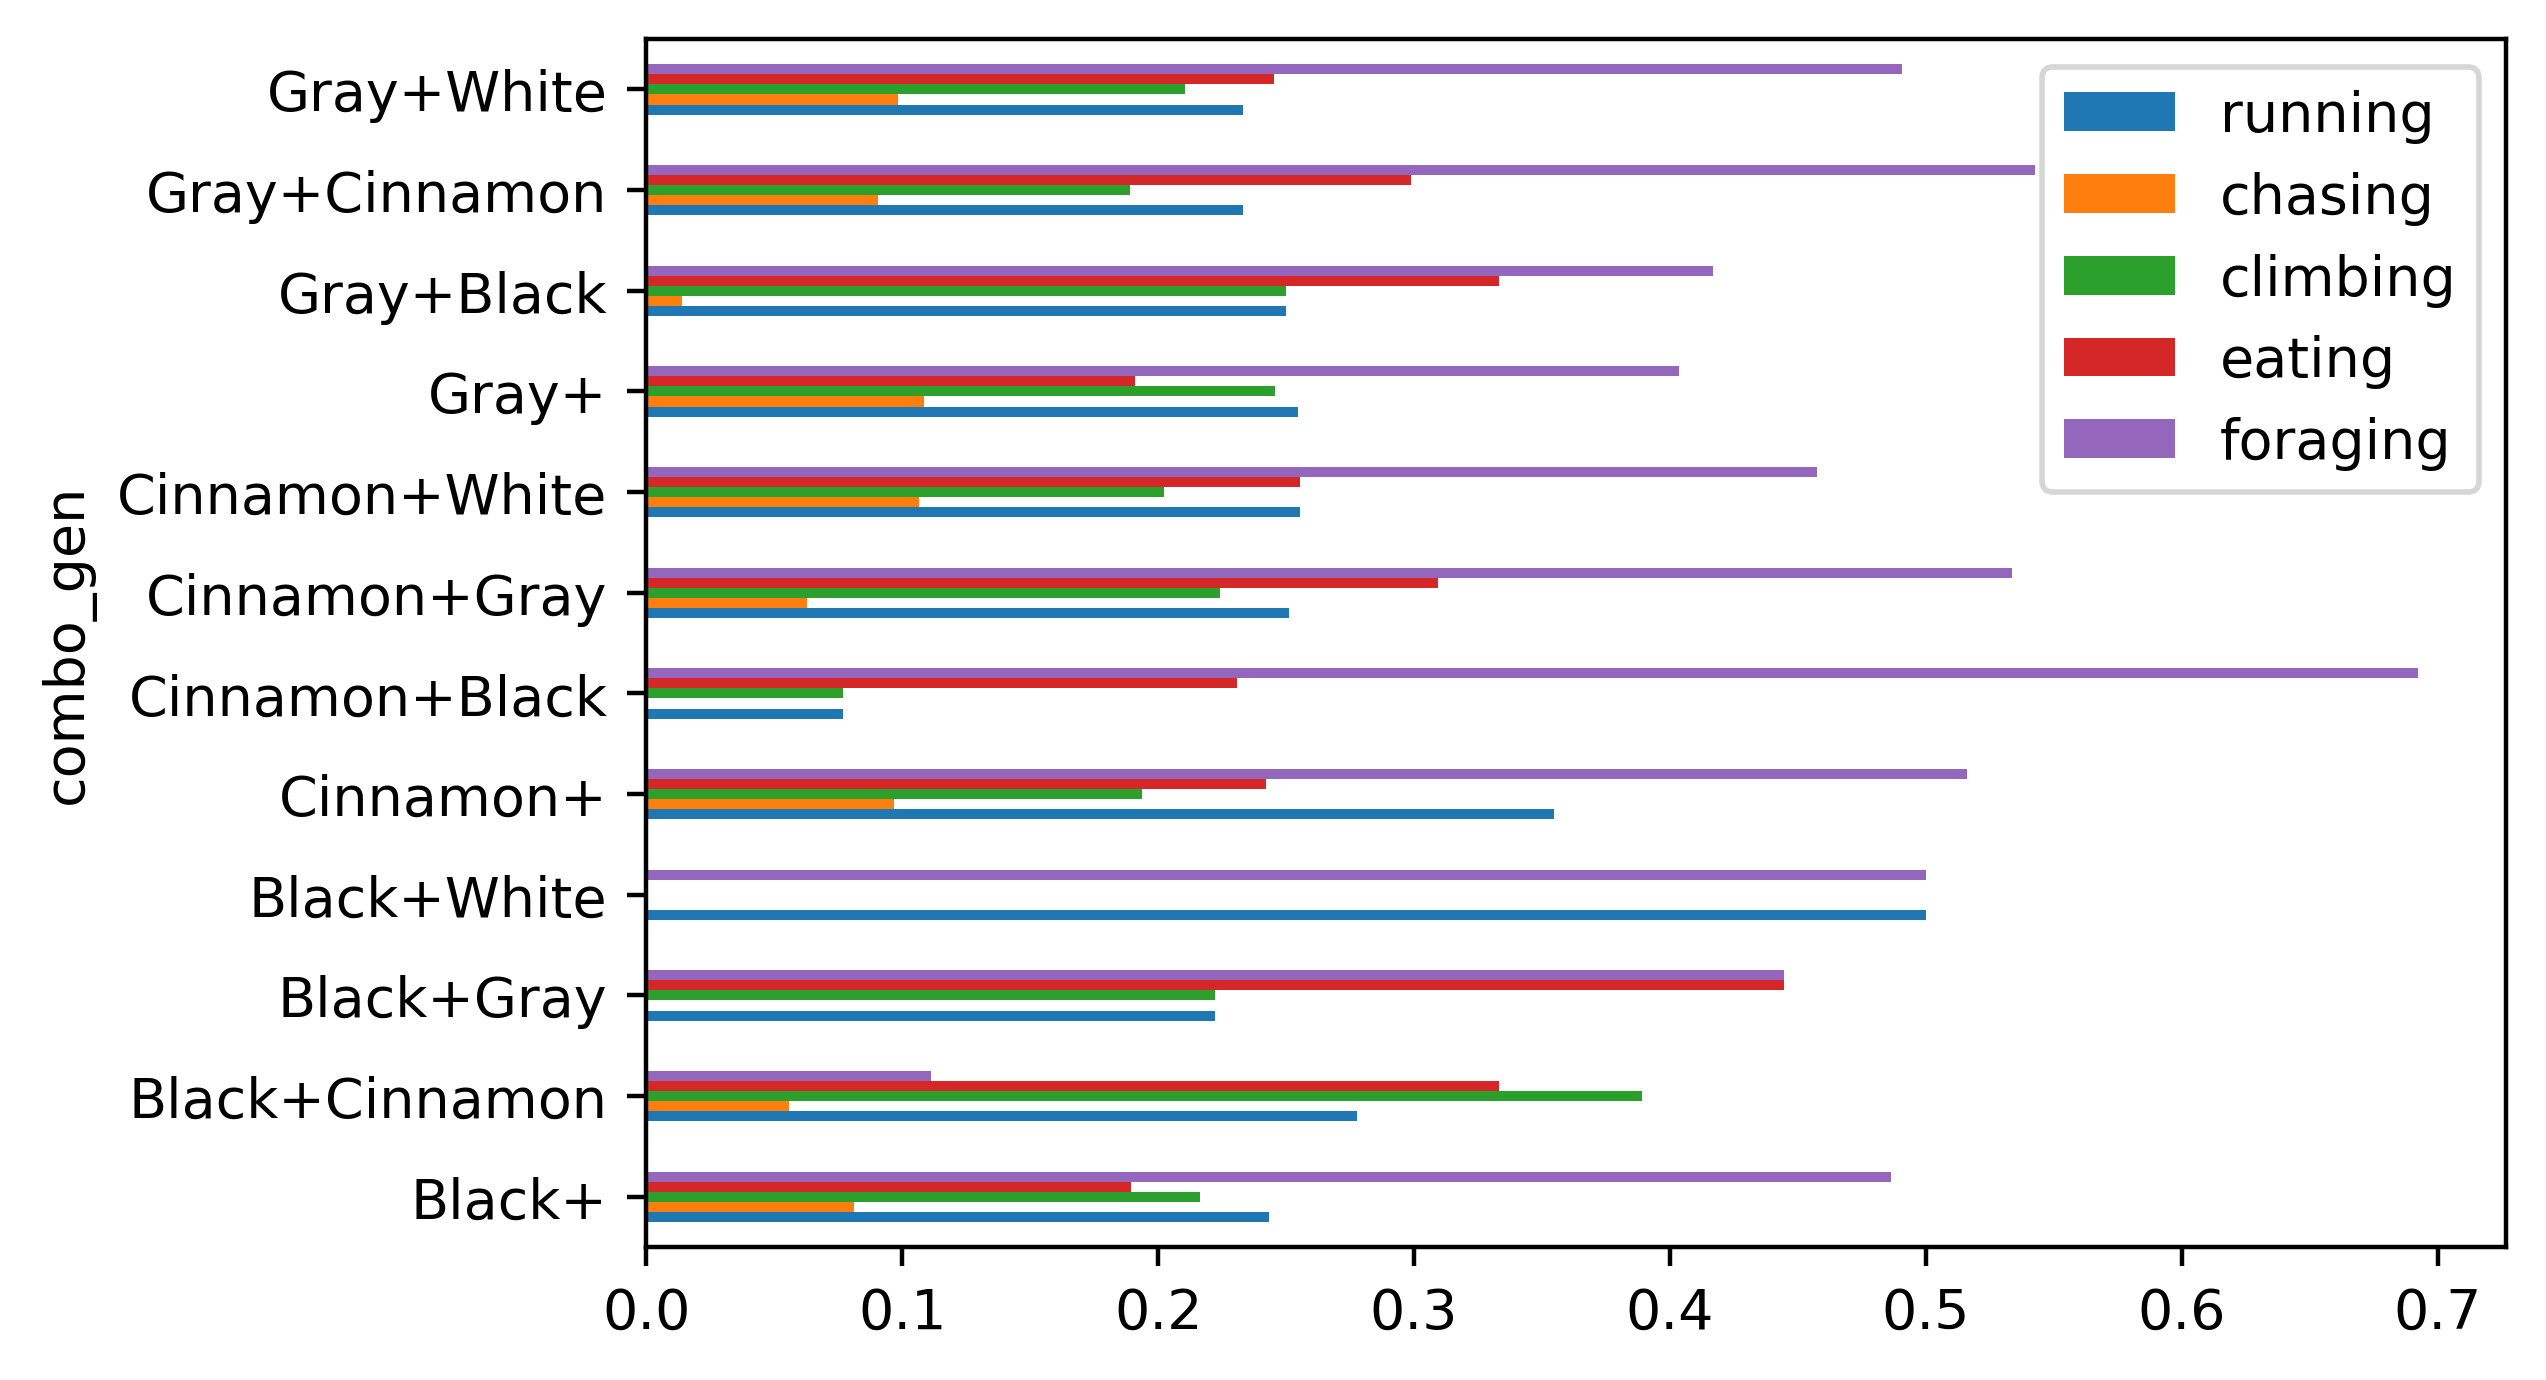

In [7]:
movements.plot(kind = 'barh');

In [8]:
comm = nyc_df.groupby('combo_gen').mean().get(['kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches'])
comm

,kuks,quaas,moans,tail_flags,tail_twitches
combo_gen,,,,,
Black+,0.027027,0.040541,0.000000,0.054054,0.108108
Black+Cinnamon,0.055556,0.055556,0.000000,0.111111,0.277778
Black+Gray,0.000000,0.111111,0.000000,0.000000,0.555556
Black+White,0.000000,0.000000,0.000000,0.000000,0.000000
Cinnamon+,0.000000,0.000000,0.000000,0.080645,0.193548
Cinnamon+Black,0.000000,0.000000,0.000000,0.076923,0.307692
Cinnamon+Gray,0.031390,0.008969,0.000000,0.076233,0.188341
Cinnamon+White,0.031915,0.031915,0.000000,0.031915,0.180851
Gray+,0.036872,0.016760,0.000000,0.033520,0.080447


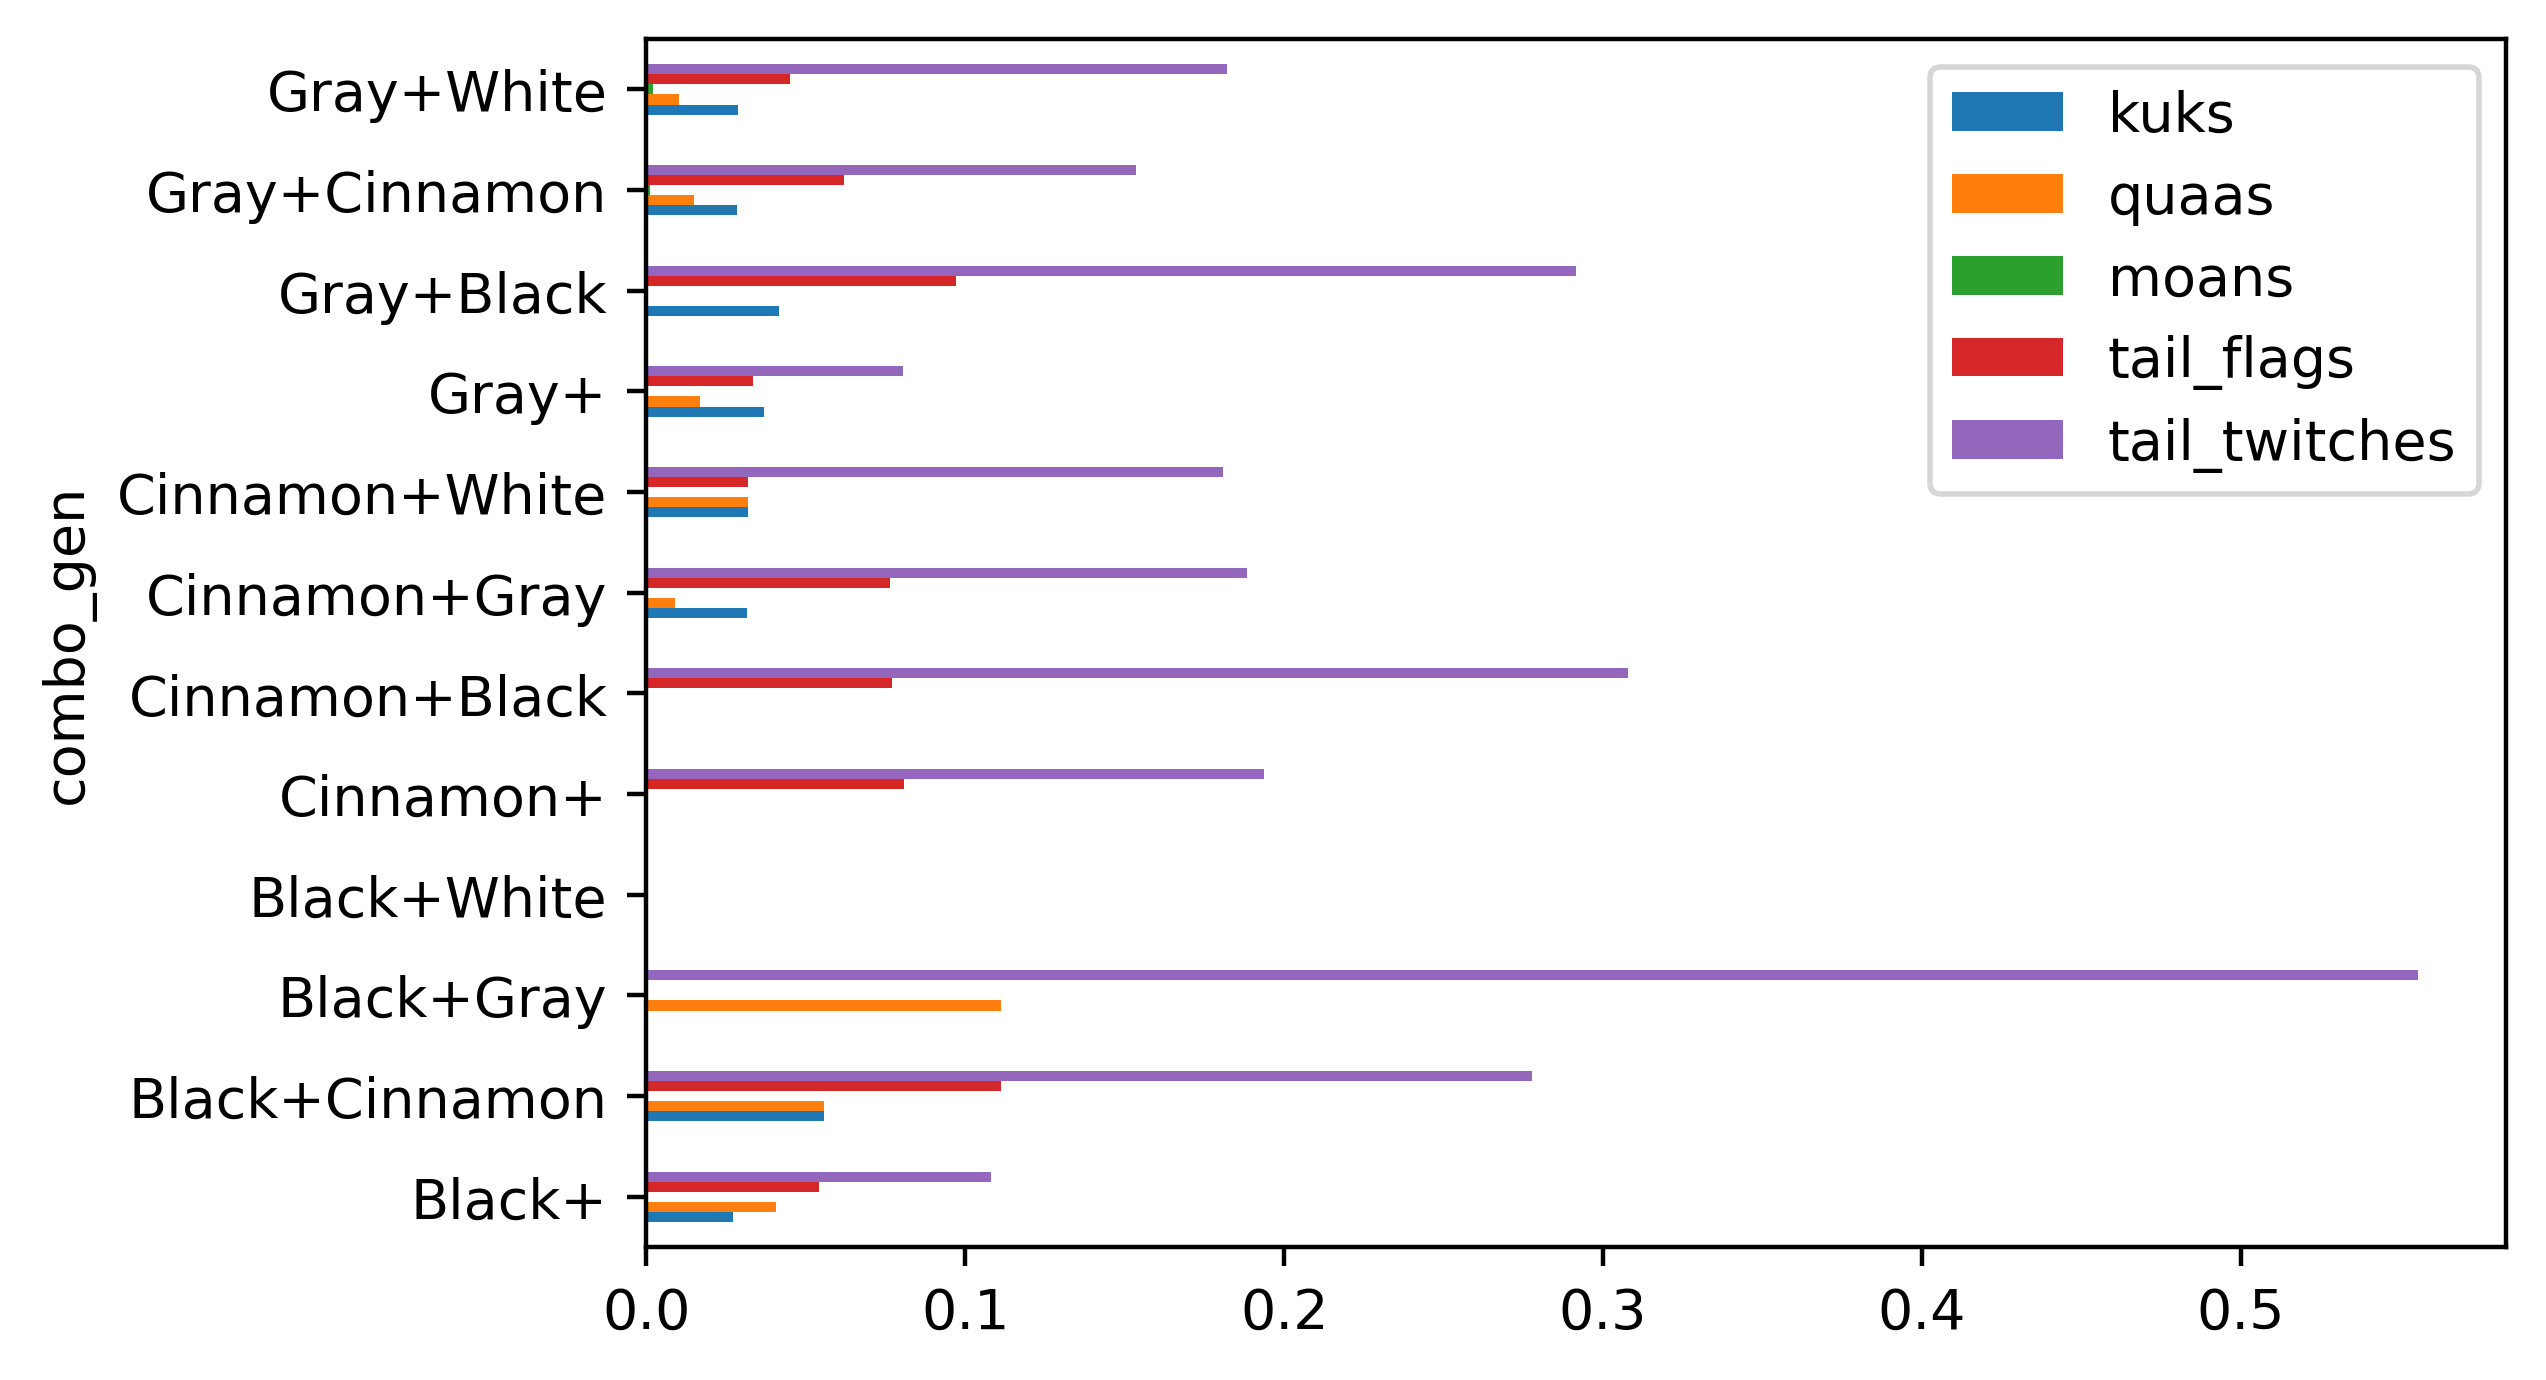

In [9]:
comm.plot(kind = 'barh');

In [10]:
human_int = nyc_df.groupby('combo_gen').mean().get(['approaches', 'indifferent', 'runs_from'])
human_int

,approaches,indifferent,runs_from
combo_gen,,,
Black+,0.040541,0.472973,0.283784
Black+Cinnamon,0.166667,0.333333,0.388889
Black+Gray,0.000000,0.222222,0.333333
Black+White,0.000000,0.500000,0.500000
Cinnamon+,0.129032,0.467742,0.209677
Cinnamon+Black,0.153846,0.692308,0.153846
Cinnamon+Gray,0.121076,0.479821,0.237668
Cinnamon+White,0.074468,0.382979,0.202128
Gray+,0.026816,0.462570,0.207821


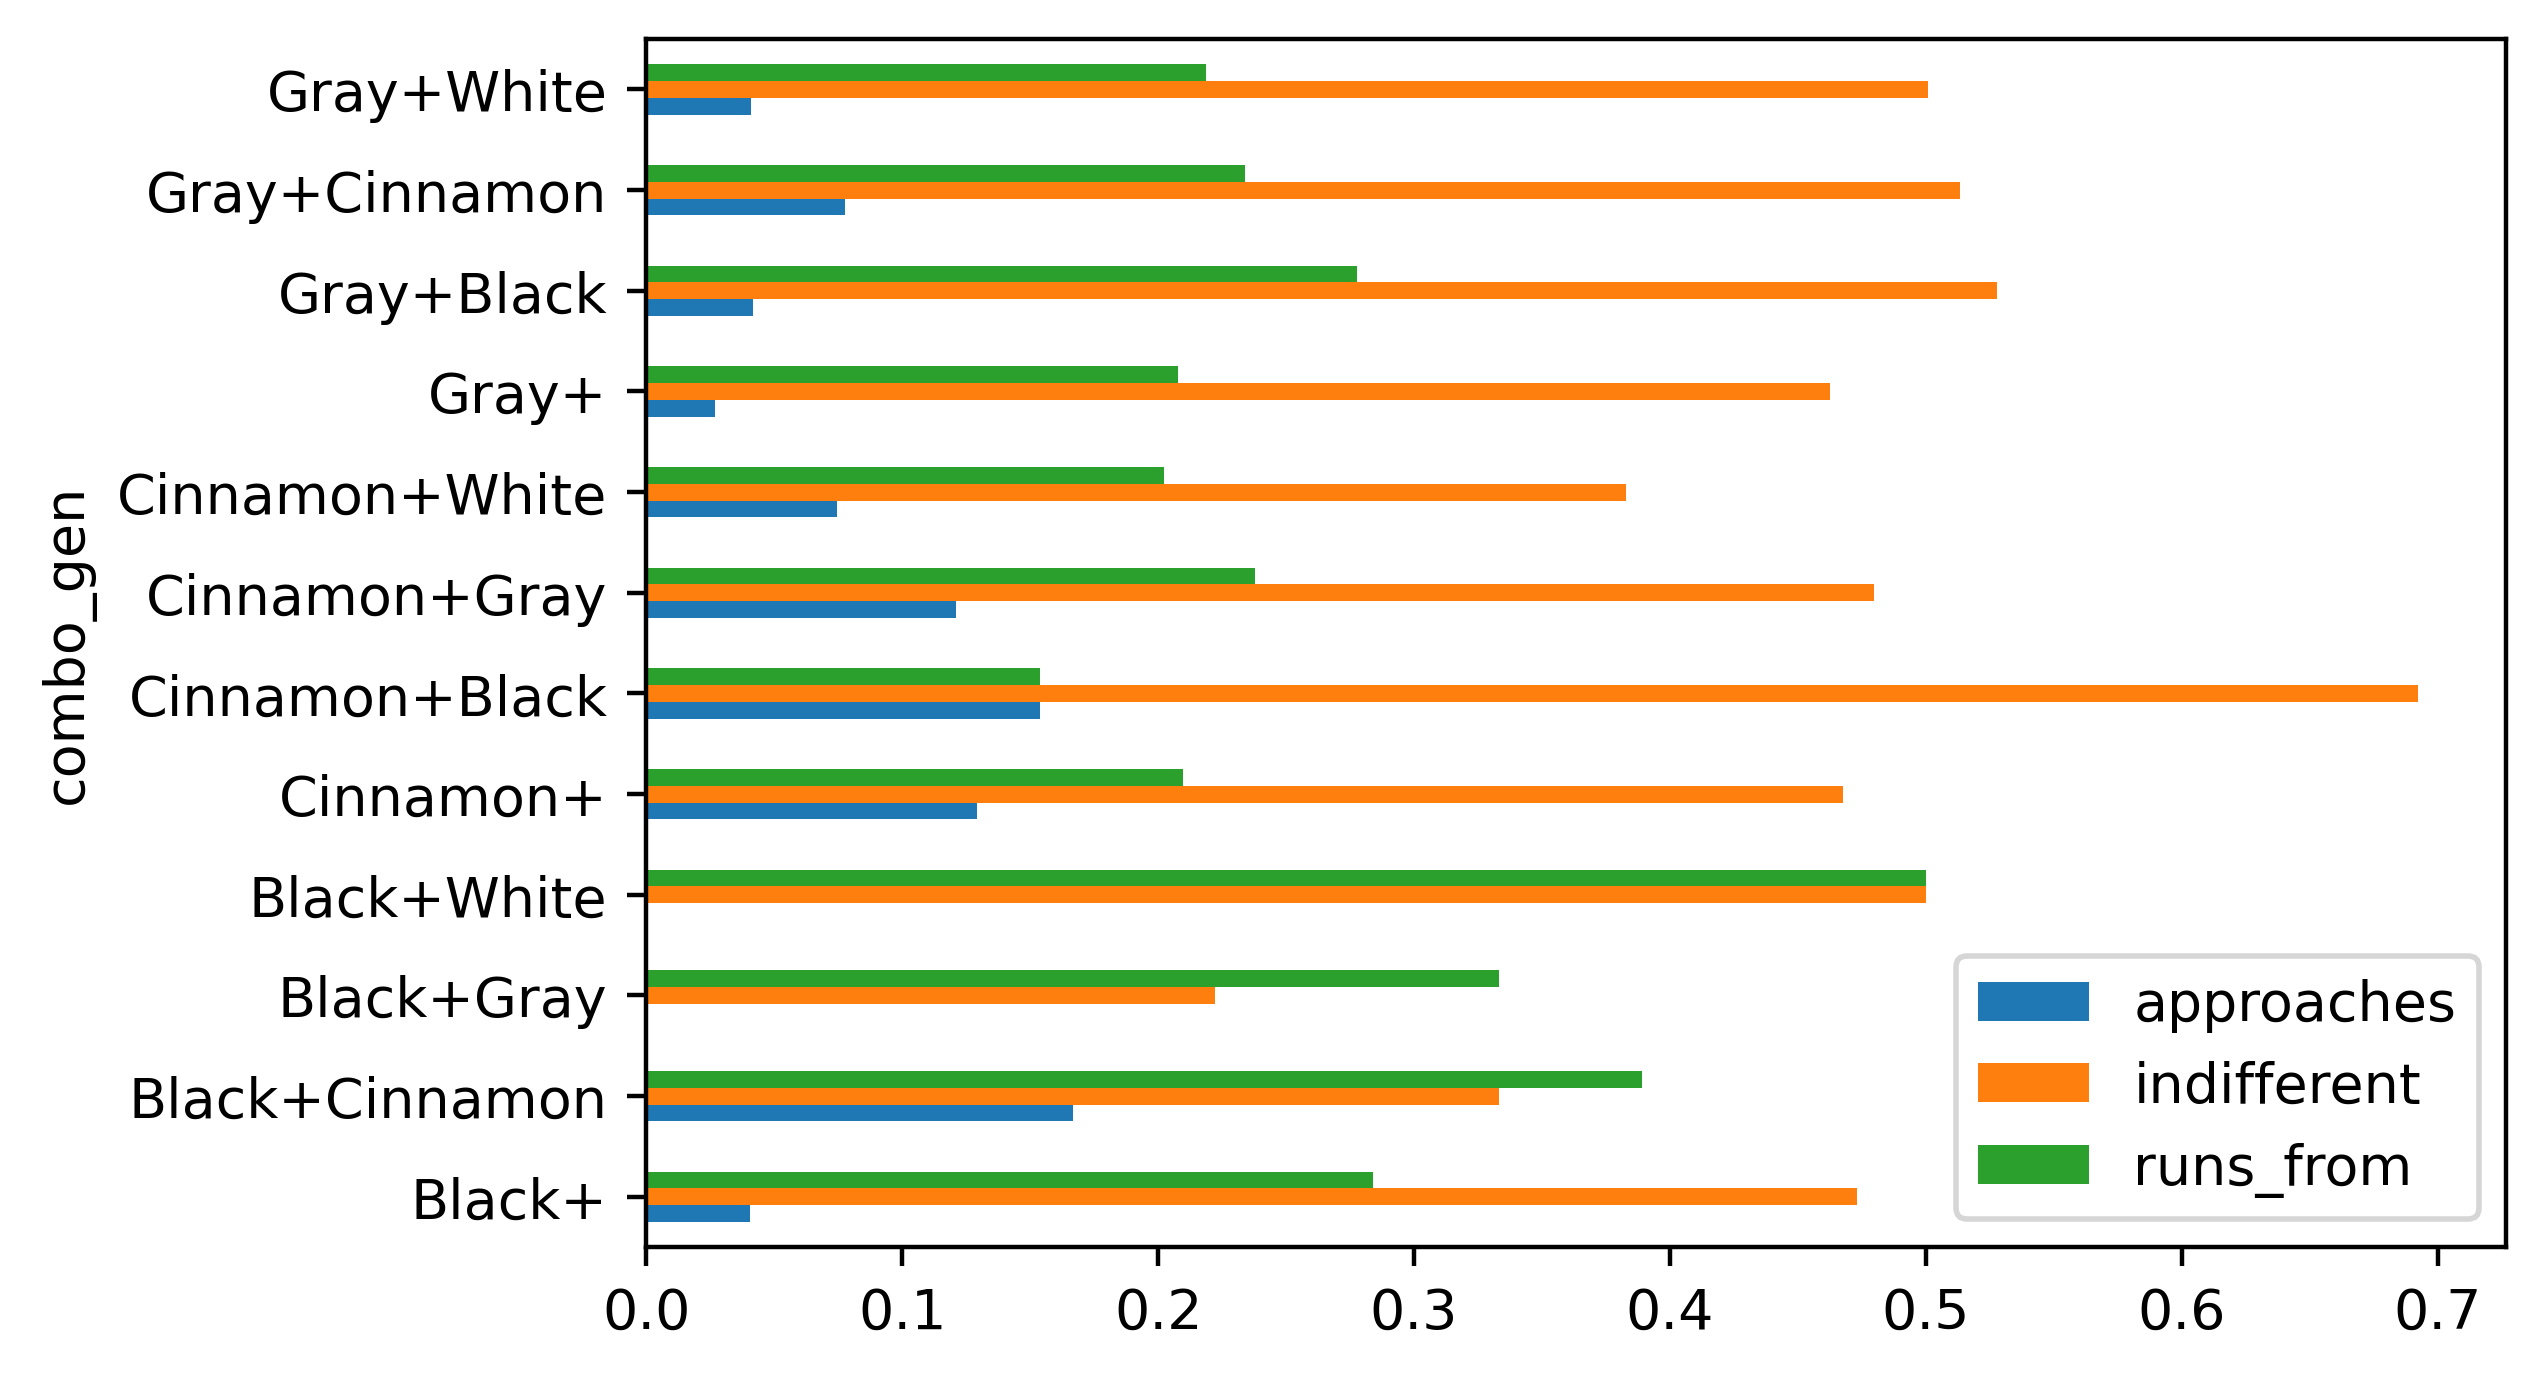

In [11]:
human_int.plot(kind = 'barh');

In [15]:
nyc_df.columns

Index(['long', 'lat', 'unique_squirrel_id', 'hectare', 'shift', 'date',
       'hectare_squirrel_number', 'age', 'primary_fur_color',
       'combination_of_primary_and_highlight_color', 'location',
       'above_ground_sighter_measurement', 'running', 'chasing', 'climbing',
       'eating', 'foraging', 'kuks', 'quaas', 'moans', 'tail_flags',
       'tail_twitches', 'approaches', 'indifferent', 'runs_from', 'lat_long',
       'community_districts', 'borough_boundaries', 'city_council_districts',
       'police_precincts', 'combo_gen'],
      dtype='object')

In [16]:
nyc_df['primary_fur_color'].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: primary_fur_color, dtype: int64

In [18]:
nyc_df['location'].value_counts()

Ground Plane    2109
Above Ground     810
Name: location, dtype: int64